#  CNN with TensorFlow - CIFAR10

### **REFERENCE**
>1.  Tom Hope, Yehezkel S. Resheff, Itay Lieder, "**Learning TensorFlow - A Guide to building Deep Learning Systems**", `Chapters 4`, O'Reilly (2017) (pdf) https://goo.gl/iEmehh
     `[ Code ]` : https://github.com/gigwegbe/Learning-TensorFlow

>2.  bigDataSpark Forum 檔案：**Basics of TensorFlow Programming-20180809.ipynb**
https://www.facebook.com/groups/753114451505938/permalink/1213353432148702/

# CIFAR10  -  an image dataset

> + `CIFAR10` is another dataset with a long history in computer vision and machine learning. 

> + Like `MNIST`, it is a common benchmark that various methods are tested against. 

> + `CIFAR10` is a set of 60,000 color images of size 32×32 pixels, each belonging to one of ten categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

> + State-of-the-art deep learning methods for this dataset are as good as humans at clas‐ sifying these images.

##  Directly download CIFAR10 for Python from the following website:
>  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

>  Ref : The CIFAR-10 dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
 https://www.cs.toronto.edu/~kriz/cifar.html

##  Starting TensorFlow ...

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
import pickle

DATA_PATH = "data/CIFAR10"

/Users/macmini1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


##  Building a Graph ...

Number of train images: 50000
Number of train labels: 50000
Number of test images: 10000
Number of test images: 10000


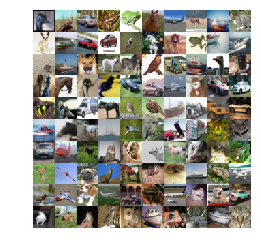

In [2]:
class CifarLoader(object):
    def __init__(self, source_files):
            self._source = source_files
            self._i = 0
            self.images = None
            self.labels = None

    def load(self):
        data = [unpickle(f) for f in self._source]
        images = np.vstack([d["data"] for d in data])
        n = len(images)
        self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1)\
                            .astype(float) / 255
        self.labels = one_hot(np.hstack([d["labels"] for d in data]), 10)
        return self
    
    def next_batch(self, batch_size):
        x, y = self.images[self._i:self._i+batch_size], self.labels[self._i:self._i+batch_size] 
        self._i = (self._i + batch_size) % len(self.images) 
        return x, y
    
def unpickle(file):
    with open(os.path.join(DATA_PATH, file), 'rb') as fo:
        ## dict = cPickle.load(fo) 
        dict = pickle.load(fo, encoding='latin1') 
    return dict

def one_hot(vec, vals=10): 
    n = len(vec)
    out = np.zeros((n, vals)) 
    out[range(n), vec] = 1 
    return out

class CifarDataManager(object): 
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i) for i in range(1, 6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

def display_cifar(images, size): 
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size)])
    plt.imshow(im)
    plt.show()
    
def test(sess):
    X = cifar.test.images.reshape(10, 1000, 32, 32, 3)
    Y = cifar.test.labels.reshape(10, 1000, 10)
    acc = np.mean([sess.run(accuracy, feed_dict={x: X[i], y_: Y[i], keep_prob: 1.0}) 
                   for i in range(10)])
    print("\n Accuracy: {:.4}%".format(acc * 100))
                                                 
        
d = CifarDataManager()
print("Number of train images: {}".format(len(d.train.images))) 
print("Number of train labels: {}".format(len(d.train.labels))) 
print("Number of test images: {}".format(len(d.test.images))) 
print("Number of test images: {}".format(len(d.test.labels))) 
images = d.train.images
display_cifar(images, 10)

In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1) 
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape) 
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                              strides=[1, 2, 2, 1], padding='SAME')
def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W) + b)

def full_layer(input, size):
    in_size = int(input.get_shape()[1]) 
    W = weight_variable([in_size, size]) 
    b = bias_variable([size])
    return tf.matmul(input, W) + b

##  Loading CIFAR10 data ...

In [6]:
cifar = CifarDataManager()

STEPS = 1000
MINIBATCH_SIZE = 250

## Model 1 :  Simple CNN for CIFAR10

In [8]:
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

conv1 = conv_layer(x, shape=[5, 5, 3, 32])
conv1_pool = max_pool_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)
conv2_flat = tf.reshape(conv2_pool, [-1, 8 * 8 * 64])

full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, 10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        if(i%100 == 0): print(" i = ", i)
        batch = cifar.train.next_batch(MINIBATCH_SIZE) 
        sess.run(train_step, feed_dict={x: batch[0], y_: batch[1],
                                            keep_prob: 0.5})
    test(sess)

 i =  0
 i =  100
 i =  200
 i =  300
 i =  400
 i =  500
 i =  600
 i =  700
 i =  800
 i =  900

 Accuracy: 65.35%


### Model 2 :  A 3-Convolution-Layer CNN for CIFAR10

In [9]:
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

conv1 = conv_layer(x, shape=[5, 5, 3, 32])
conv1_pool = max_pool_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)

conv3 = conv_layer(conv2_pool, shape=[5, 5, 64, 128])
conv3_pool = max_pool_2x2(conv3)

conv3_flat = tf.reshape(conv3_pool, [-1, 4 * 4 * 128])  
conv3_drop = tf.nn.dropout(conv3_flat, keep_prob=keep_prob)

full_1 = tf.nn.relu(full_layer(conv3_drop, 512))
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)
y_conv = full_layer(full1_drop, 10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        if(i%100 == 0): print(" i = ", i)
        batch = cifar.train.next_batch(MINIBATCH_SIZE) 
        sess.run(train_step, feed_dict={x: batch[0], y_: batch[1],
                                            keep_prob: 0.5})
    test(sess)

 i =  0
 i =  100
 i =  200
 i =  300
 i =  400
 i =  500
 i =  600
 i =  700
 i =  800
 i =  900

 Accuracy: 60.99%


### Model 3 :  A More Complicated CNN for CIFAR10

In [10]:
C1,C2,C3=30,50,80 
F1=500

conv1_1 = conv_layer(x, shape=[3, 3, 3, C1])
conv1_2 = conv_layer(conv1_1, shape=[3, 3, C1, C1])
conv1_3 = conv_layer(conv1_2, shape=[3, 3, C1, C1])
conv1_pool = max_pool_2x2(conv1_3)
conv1_drop = tf.nn.dropout(conv1_pool, keep_prob=keep_prob)
    
conv2_1 = conv_layer(conv1_drop, shape=[3, 3, C1, C2])
conv2_2 = conv_layer(conv2_1, shape=[3, 3, C2, C2])
conv2_3 = conv_layer(conv2_2, shape=[3, 3, C2, C2])
conv2_pool = max_pool_2x2(conv2_3)
conv2_drop = tf.nn.dropout(conv2_pool, keep_prob=keep_prob)

conv3_1 = conv_layer(conv2_drop, shape=[3, 3, C2, C3])
conv3_2 = conv_layer(conv3_1, shape=[3, 3, C3, C3])
conv3_3 = conv_layer(conv3_2, shape=[3, 3, C3, C3])
conv3_pool = tf.nn.max_pool(conv3_3, ksize=[1, 8, 8, 1], strides=[1, 8, 8, 1],
                                padding='SAME')
conv3_flat = tf.reshape(conv3_pool, [-1, C3])
conv3_drop = tf.nn.dropout(conv3_flat, keep_prob=keep_prob)
full1 = tf.nn.relu(full_layer(conv3_flat, F1))
full1_drop = tf.nn.dropout(full1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, 10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        if(i%100 == 0): print(" i = ", i)
        batch = cifar.train.next_batch(MINIBATCH_SIZE) 
        sess.run(train_step, feed_dict={x: batch[0], y_: batch[1],
                                            keep_prob: 0.5})
    test(sess)

 i =  0
 i =  100
 i =  200
 i =  300
 i =  400
 i =  500
 i =  600
 i =  700
 i =  800
 i =  900

 Accuracy: 44.71%


## See `Who Is the Best in CIFAR-10?` for a list of methods and associated papers.
> `Who Is the Best in CIFAR-10?` http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130


***


## [ EXERCISE ] :  請修改上述程式範例，並輸出至 TensorBoard。
>   [ Hint ] : Using **`tf.name_scope`**, **`tf.summary`**, ...